#Introduction to Neural Networks: ReneWind

##Data Description

###This dataset appears to be preprocessed data related to loan status prediction. Here's a breakdown of the columns:

loan_status: The target variable, indicating the status of a loan (likely binary or categorical).
Principal: The principal amount of the loan.
age: The age of the loan applicant.
education_Bechalor, education_High School or Below, education_Master or Above, education_college: These columns seem to be one-hot encoded representations of the education level of the loan applicants.
Gender_female, Gender_male: One-hot encoded columns representing the gender of the loan applicants.
terms_7, terms_15, terms_30: These are likely one-hot encoded representations of the loan terms (e.g., 7 days, 15 days, 30 days).
File: Train.csv

This dataset seems to be a collection of anonymized features (V1 to V40) used for a classification task.

V1 to V40: These are numerical features, likely the independent variables for the classification model.
Target: The target variable, indicating the class label for each data point.

In [ ]:
#Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.23.5 pandas==1.5.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding t

In [2]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.

from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.

import time  # Module for time-related operations.
import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense   # for creating fully connected neural network layers.

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

In [4]:
RenewindTrain = pd.read_csv('/content/Train.csv')
RenewindTest = pd.read_csv('/content/Test.csv')

In [5]:
# copying data to another varaible to avoid any changes to original data
dataTrain = RenewindTrain.copy()


In [6]:
dataTrain.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [ ]:
dataTrain.tail()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071318,-1.088279,-0.796174,-3.011720,-2.287540,2.807310,0.481428,0.105171,-0.586599,-2.899398,...,-8.273996,5.745013,0.589014,-0.649988,-3.043174,2.216461,0.608723,0.178193,2.927755,1
19996,2.890264,2.483069,5.643919,0.937053,-1.380870,0.412051,-1.593386,-5.762498,2.150096,0.272302,...,-4.159092,1.181466,-0.742412,5.368979,-0.693028,-1.668971,3.659954,0.819863,-1.987265,0
19997,-3.896979,-3.942407,-0.351364,-2.417462,1.107546,-1.527623,-3.519882,2.054792,-0.233996,-0.357687,...,7.112162,1.476080,-3.953710,1.855555,5.029209,2.082588,-6.409304,1.477138,-0.874148,0
19998,-3.187322,-10.051662,5.695955,-4.370053,-5.354758,-1.873044,-3.947210,0.679420,-2.389254,5.456756,...,0.402812,3.163661,3.752095,8.529894,8.450626,0.203958,-7.129918,4.249394,-6.112267,0
19999,-2.686903,1.961187,6.137088,2.600133,2.657241,-4.290882,-2.344267,0.974004,-1.027462,0.497421,...,6.620811,-1.988786,-1.348901,3.951801,5.449706,-0.455411,-2.202056,1.678229,-1.974413,0


In [ ]:
dataTrain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [ ]:
# let's check for duplicate values in the data
dataTrain.duplicated().sum()


np.int64(0)

In [ ]:
# Checking for the null value in the dataset
dataTrain.isna().sum()


,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [ ]:
dataTrain.nunique()

,0
V1,19982
V2,19982
V3,20000
V4,20000
V5,20000
V6,20000
V7,20000
V8,20000
V9,20000
V10,20000


In [ ]:
# let's view the statistical summary of the numerical columns in the data
dataTrain.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


#Exploratory Data Analysis

##UniVariate Analysis


In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    # Check if the feature is numerical before calculating mean and median
    if pd.api.types.is_numeric_dtype(data[feature]):
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        ) if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2
        )  # For histogram
        ax_hist2.axvline(
            data[feature].mean(), color="green", linestyle="--"
        )  # Add mean to the histogram
        ax_hist2.axvline(
            data[feature].median(), color="black", linestyle="-"
        )  # Add median to the histogram
    else:
        # If feature is categorical, create a countplot instead of histogram
        sns.countplot(data=data, x=feature, ax=ax_hist2, palette="winter")

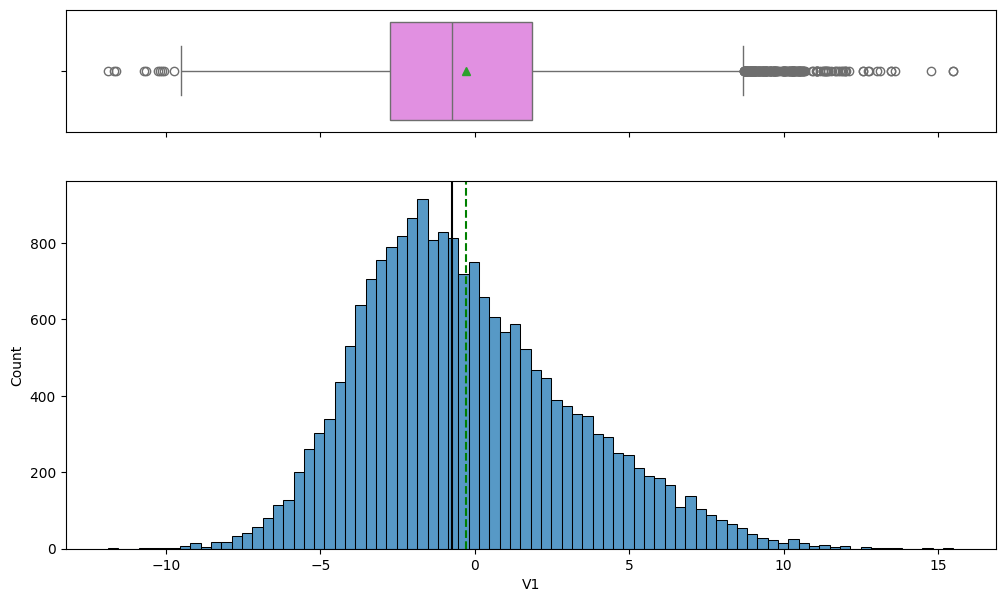

In [ ]:
histogram_boxplot(dataTrain,'V1')

Variable V1 is slightly negatively skewed. This means that the distribution has a longer tail on the left side, and the mean is slightly less than the median.
There are numerous outliers, especially on the positive side of the distribution. This suggests that some data points have significantly higher values for V1 compared to the rest.
The mean and median are close but not identical, indicating the skewness of the data.
The data is unimodal, meaning it has a single peak.
Potential Implications:

The presence of outliers might require further investigation to understand their cause and whether they should be treated or removed.
The skewness of the data might impact the choice of statistical methods for analysis.
Understanding this distribution is important in the context of whatever data set that V1 is a feature of.

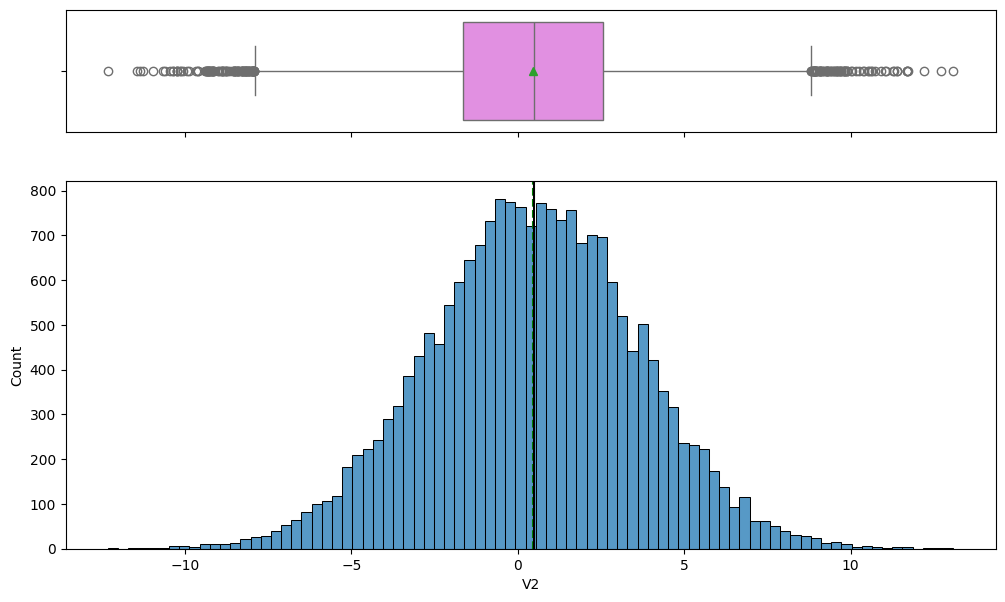

In [ ]:
histogram_boxplot(dataTrain,'V2')

Summary of Observations:

Variable V2 is roughly symmetrically distributed. This means that the distribution is balanced around the center, and the mean and median are similar.
There are numerous outliers on both sides of the distribution. This suggests that some data points have significantly lower and higher values for V2 compared to the rest.
The mean and median are very close, indicating the symmetry of the data.
The data is unimodal, meaning it has a single peak.
Potential Implications:

The presence of outliers might require further investigation to understand their cause and whether they should be treated or removed.
The symmetry of the data suggests that statistical methods that assume normality might be applicable.
Understanding this distribution is important in the context of whatever dataset that V2 is a feature of.

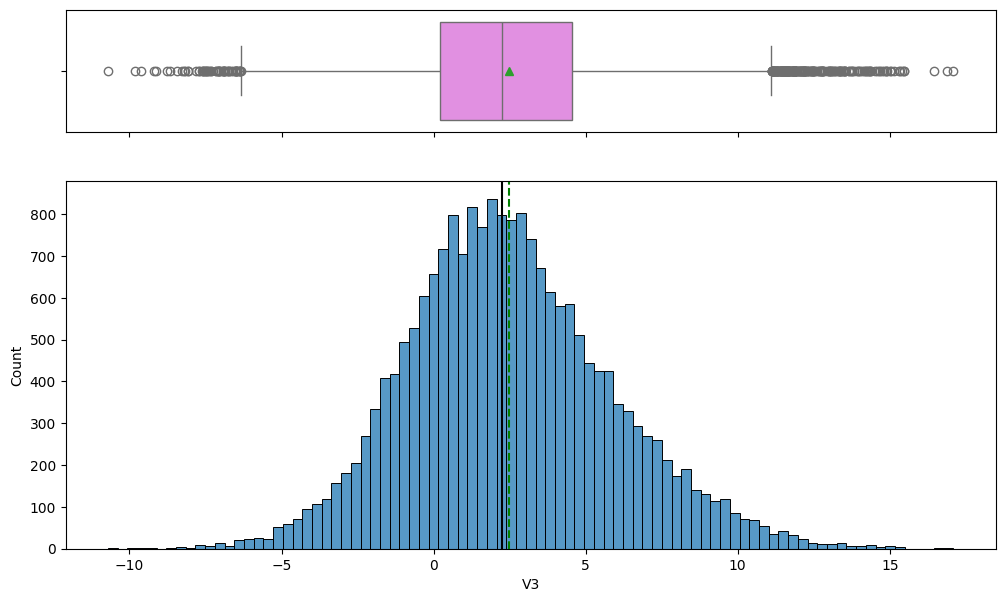

In [ ]:
import warnings #Importing warnings module.
histogram_boxplot(dataTrain,'V3')
warnings.filterwarnings('ignore')#Ignoring warnings

Summary of Observations:

Variable V3 is slightly positively skewed. This means that the distribution has a slightly longer tail on the right side, and the mean is slightly greater than the median.
There are numerous outliers on both sides of the distribution, with more on the positive side. This suggests that some data points have significantly lower and higher values for V3 compared to the rest.
The mean is slightly greater than the median, indicating the positive skewness of the data.
The data is unimodal, meaning it has a single peak.
Potential Implications:

The presence of outliers might require further investigation to understand their cause and whether they should be treated or removed.
The slight positive skewness of the data might impact the choice of statistical methods for analysis.
Understanding this distribution is important in the context of whatever dataset that V3 is a feature of.

##
Bivariate Analysis

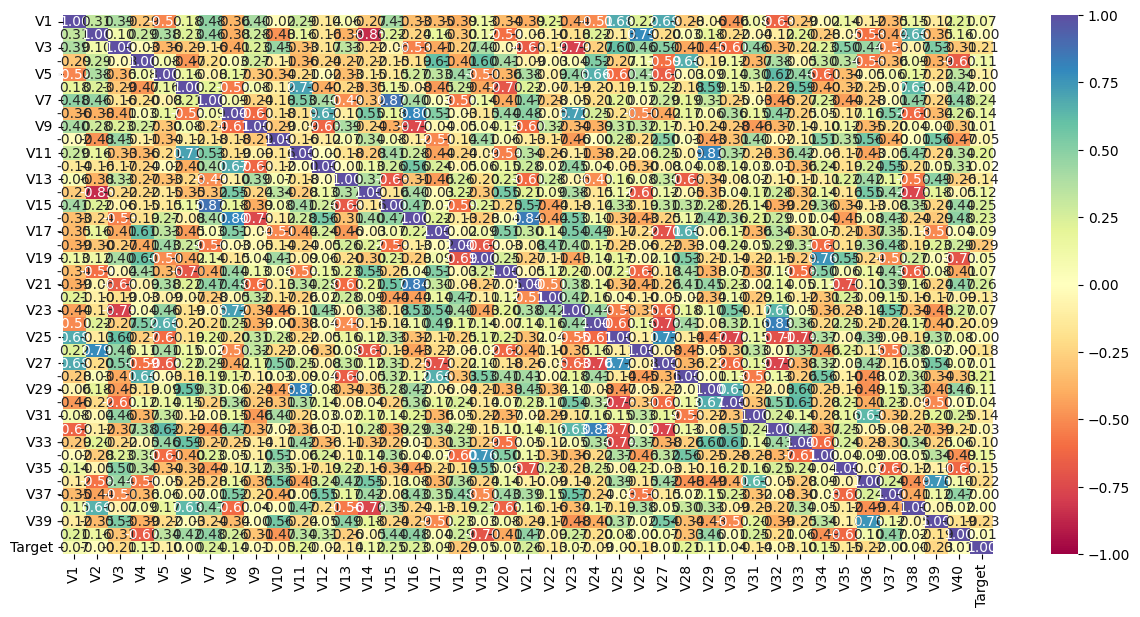

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    dataTrain.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

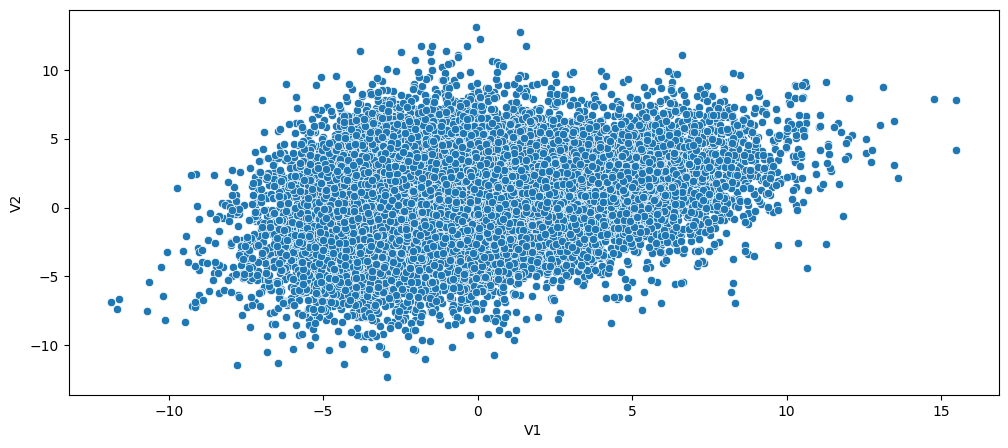

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x="V1", y="V2", data=dataTrain)
plt.show()

##V2 Vs Target

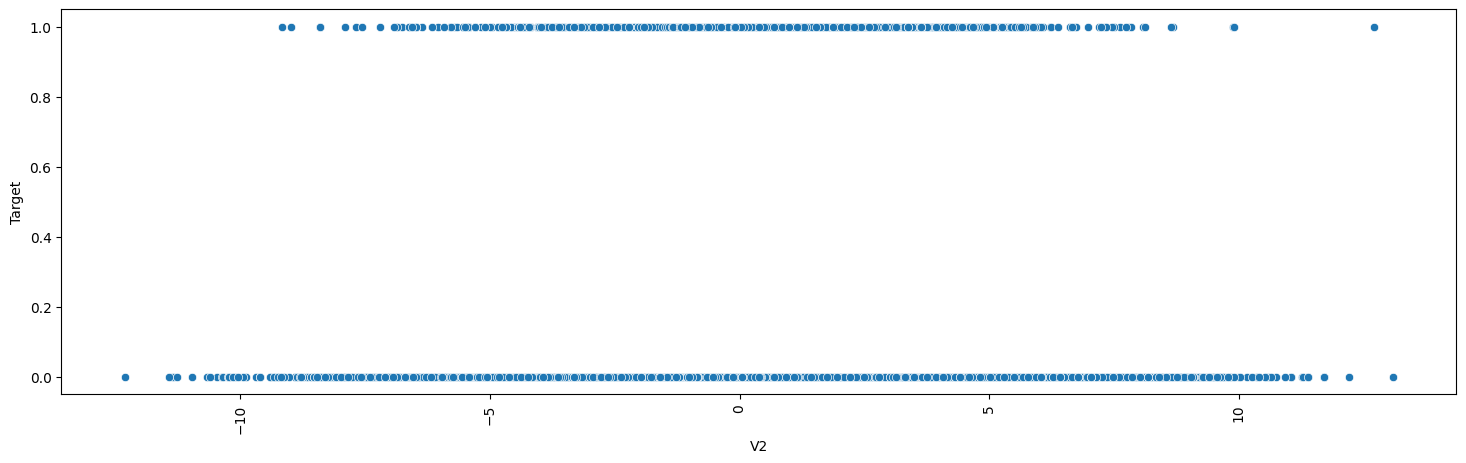

In [ ]:
plt.figure(figsize=(18, 5))
sns.scatterplot(x="V2", y="Target", data=dataTrain)
plt.xticks(rotation=90)
plt.show()

#LOADING THE DATA



In [8]:
import pandas as pd

# Load the training dataset
dataTrain = pd.read_csv('/content/Train.csv')

# Load the testing dataset
dataTest = pd.read_csv('/content/Test.csv')

# Prepare the training data
X_train = dataTrain.drop('Target', axis=1)  # Features (replace 'Target' with your target column name)
y_train = dataTrain['Target']  # Target variable

# Prepare the testing data
X_test = dataTest.drop('Target', axis=1)  # Features (replace 'Target' with your target column name)
y_test = dataTest['Target']  # Target variable

# Handle missing values (if any) - for both training and testing sets
X_train['V1'].fillna(X_train['V1'].median(), inplace=True)
X_train['V2'].fillna(X_train['V2'].median(), inplace=True)

X_test['V1'].fillna(X_test['V1'].median(), inplace=True)
X_test['V2'].fillna(X_test['V2'].median(), inplace=True)

# Now you have:
# X_train, y_train: Training features and target
# X_test, y_test: Testing features and target

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20000, 40)
X_test shape: (5000, 40)
y_train shape: (20000,)
y_test shape: (5000,)


<ipython-input-8-4302dbc9410a>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['V1'].fillna(X_train['V1'].median(), inplace=True)
<ipython-input-8-4302dbc9410a>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

<ipython-input-9-1487fcd38318>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axarr[i, 0].scatter(feature1, feature2, cmap="gray")  # Plotting the first two features


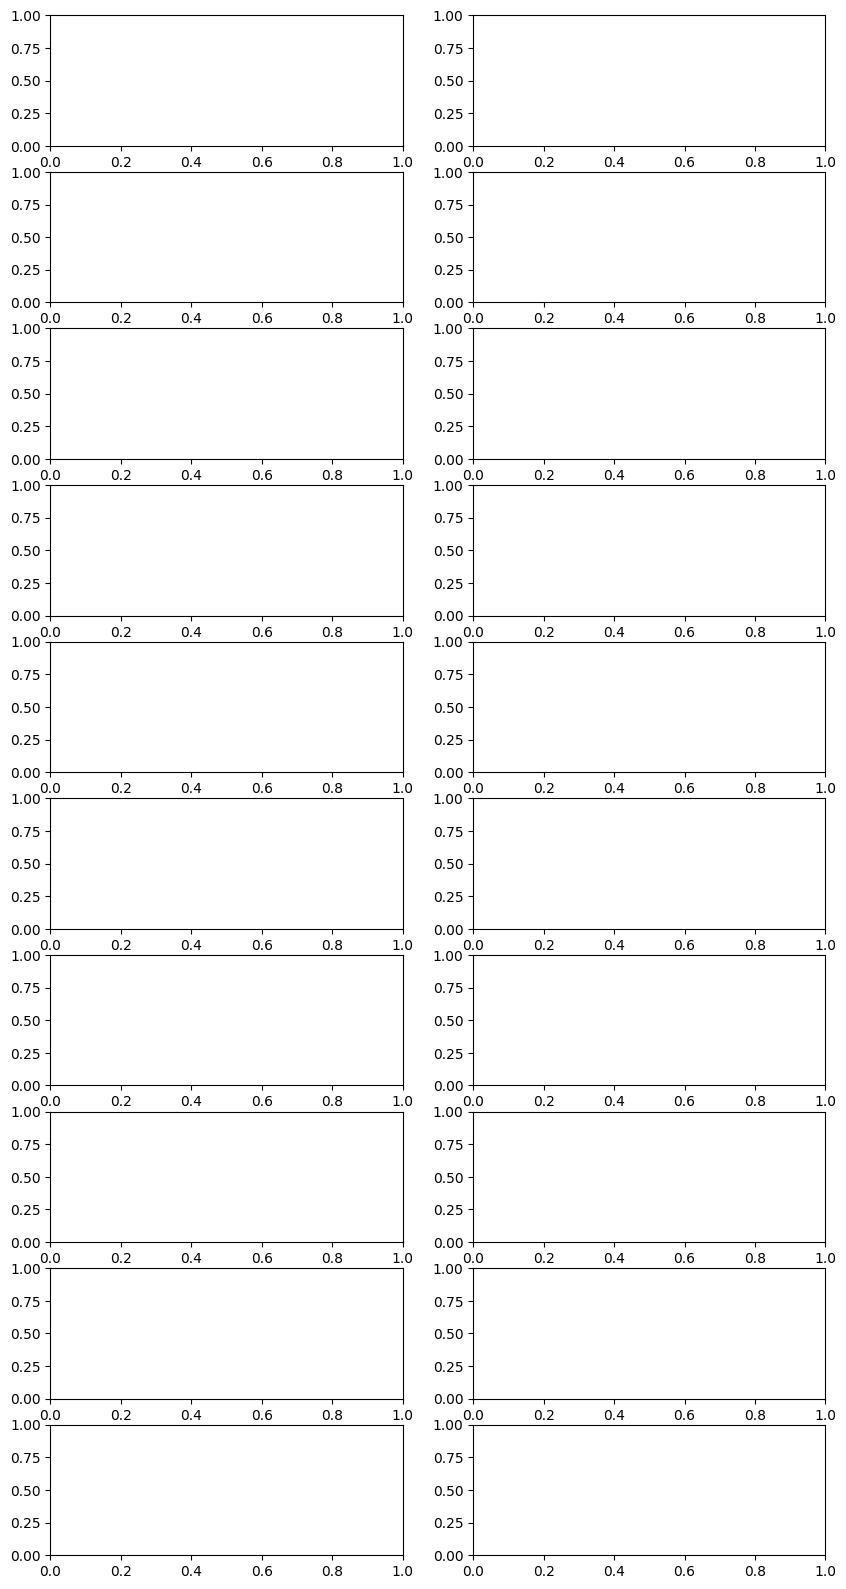

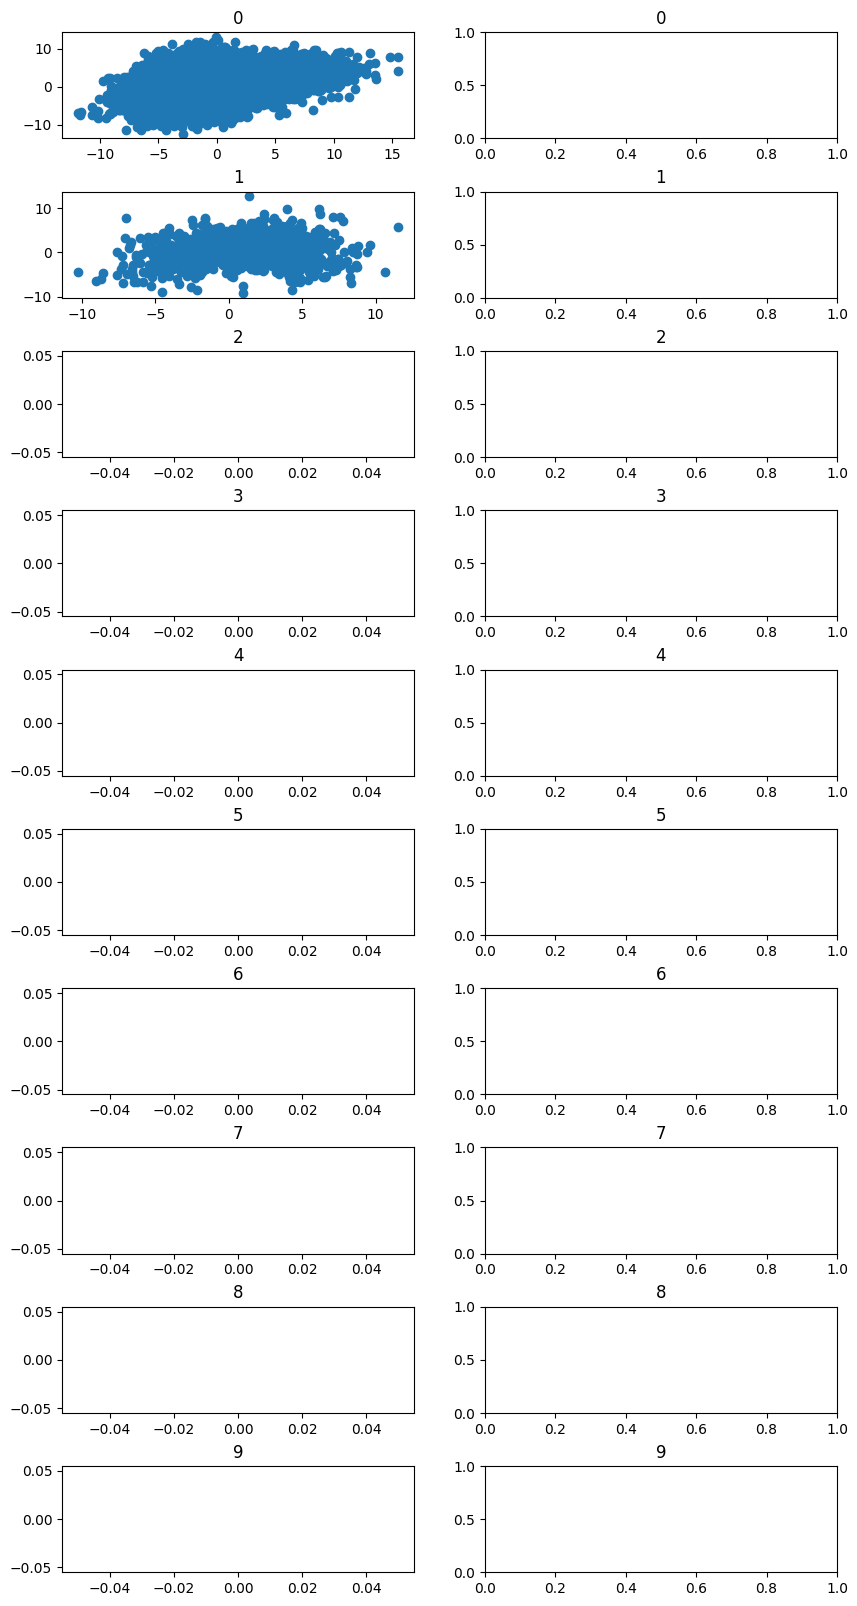

In [9]:
import matplotlib.pyplot as plt # Importing the pyplot module from matplotlib and assigning it to the alias 'plt'.

f, axarr = plt.subplots(10, 2, figsize=(10, 20))  # Grid of size 10x20, with 10 rows and 2 columns
f, axarr = plt.subplots(10, 2, figsize=(10, 20))  # Grid of size 10x20, with 10 rows and 2 columns

for i in range(10):  # For each digit
    # Corrected variable name from x_train to X_train
    images = X_train[y_train == i]  # Filtering all the images based on the digit.

    # Assuming 'V1', 'V2', ... are your features, select the first two for visualization
    feature1 = images['V1'].values
    feature2 = images['V2'].values

    # Create scatter plots instead of imshow
    axarr[i, 0].scatter(feature1, feature2, cmap="gray")  # Plotting the first two features
    # You can similarly plot other features in axarr[i, 1] or modify the visualization

    axarr[i, 0].axis('on')  # Show axes
    axarr[i, 1].axis('on')  # Show axes
    axarr[i, 0].set_title(str(i))  # Setting the title as the label of the digit.
    axarr[i, 1].set_title(str(i))  # Setting the title as the label of the digit.

plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots
plt.show()  # Displaying the plot.

###In summary:

The histogram effectively visualizes the distribution of a single quantitative variable. However, it lacks context due to the generic labels and title. To make it a more informative and useful visualization, it's crucial to provide specific labels and a descriptive title that reflect the data being presented.

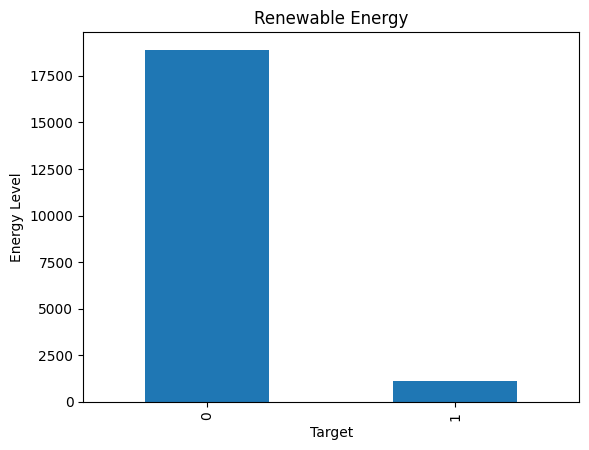

In [11]:
# frequency plot of the dependent variable in the training dataset
(pd.Series(y_train).value_counts()).plot.bar() #Removed indexing to include all values present in the series
plt.title("Renewable Energy") #Setting the title
plt.xlabel("Target") #Defining the label for the x-axis
plt.ylabel("Energy Level") #Defining the label for the y-axis.
plt.show() #Displaying the plot.

###In summary, the graph illustrates a significant disparity in renewable energy levels between two target categories. The "0" category exhibits a substantially higher energy level compared to the "1" category.

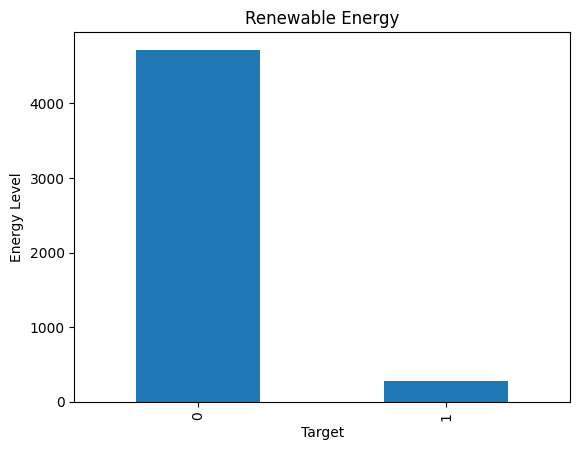

In [12]:
# frequency plot of the dependent variable in the test dataset
(pd.Series(y_test).value_counts()).plot.bar() #Removed indexing to include all values present in the series
plt.title("Renewable Energy") #Setting the title
plt.xlabel("Target") #Defining the label for the x-axis
plt.ylabel("Energy Level") #Defining the label for the y-axis.
plt.show() #Displaying the plot.

In summary, the graph illustrates a significant disparity in renewable energy levels between two target categories. The "0" category exhibits a substantially higher energy level compared to the "1" category.

#Data Preprocessing


##Data Preparation for Modeling


In [ ]:
# Assuming 'dataTrain' contains your features and target
X = dataTrain.drop('Target', axis=1)  # Features (replace 'Target' with your target column name)
y = dataTrain['Target']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Split the training data into train and validation sets
# Adjusted the split to ensure consistent shapes
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
#Printing the shape of the dataset.
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(12800, 40)
(12800,)
(3200, 40)
(3200,)


##Data Scaling



In [ ]:
#Printing the maximum value and the minimum value of the independent variable.
print(x_train.max(),X_test.max(),x_val.max()) # Changed x_test to X_test
print(x_train.min(),X_test.min(),x_val.min()) # Changed x_test to X_test

V1     15.493002
V2     13.089269
V3     15.466513
V4     12.754851
V5      8.133797
V6      5.999295
V7      8.006091
V8     11.514232
V9      8.137580
V10     7.978001
V11    11.826433
V12    15.080698
V13    12.664695
V14     5.670664
V15    12.246455
V16    13.583212
V17    15.753939
V18    12.173707
V19    13.237742
V20    14.381303
V21    13.840473
V22     7.409856
V23    14.458734
V24    17.163291
V25     7.034684
V26    16.836410
V27    17.560404
V28     6.527643
V29    10.722055
V30    11.387218
V31    17.255090
V32    23.633187
V33    16.692486
V34    13.768743
V35    14.788411
V36    19.329576
V37     7.467006
V38    15.289923
V39     7.252111
V40    10.654265
dtype: float64 V1     12.771586
V2     11.295240
V3     15.455270
V4     13.236381
V5      7.791526
V6      5.996742
V7      7.520457
V8     11.679495
V9      8.057009
V10     8.108472
V11     9.003260
V12    11.727150
V13    12.903605
V14     5.446828
V15    11.779989
V16    12.232483
V17    16.756432
V18    12.363036

In [ ]:
# Normalizing the dataset
x_train, x_val, X_test = x_train.astype("float32")/(255), x_val.astype("float32")/(255), X_test.astype("float32")/(255) # Changed x_test to X_test

In [ ]:
#Printing the maximum value and the minimum value of the independent variable.
print(x_train.max(),X_test.max(),x_val.max()) # Changed x_test to X_test
print(x_train.min(),X_test.min(),x_val.min()) # Changed x_test to X_test

V1     0.060757
V2     0.051330
V3     0.060653
V4     0.050019
V5     0.031897
V6     0.023527
V7     0.031396
V8     0.045154
V9     0.031912
V10    0.031286
V11    0.046378
V12    0.059140
V13    0.049665
V14    0.022238
V15    0.048025
V16    0.053267
V17    0.061780
V18    0.047740
V19    0.051913
V20    0.056397
V21    0.054276
V22    0.029058
V23    0.056701
V24    0.067307
V25    0.027587
V26    0.066025
V27    0.068864
V28    0.025599
V29    0.042047
V30    0.044656
V31    0.067667
V32    0.092679
V33    0.065461
V34    0.053995
V35    0.057994
V36    0.075802
V37    0.029282
V38    0.059960
V39    0.028440
V40    0.041781
dtype: float32 V1     0.050085
V2     0.044295
V3     0.060609
V4     0.051907
V5     0.030555
V6     0.023517
V7     0.029492
V8     0.045802
V9     0.031596
V10    0.031798
V11    0.035307
V12    0.045989
V13    0.050602
V14    0.021360
V15    0.046196
V16    0.047971
V17    0.065711
V18    0.048482
V19    0.049964
V20    0.062950
V21    0.041800
V22    0.

##Previously, the range was  [0,30]
##Now, the range after normalizing is  [0,1]

##Reshaping the input


In [ ]:
#Reshaping the image data
x_train = x_train.values.reshape(x_train.shape[0],-1) # Convert x_train to a NumPy array before reshaping using .values
x_val = x_val.values.reshape(x_val.shape[0],-1) # Convert x_val to a NumPy array before reshaping using .values
X_test = X_test.values.reshape(X_test.shape[0],-1) # Convert X_test to a NumPy array before reshaping using .values and assigned to X_test

In [ ]:
print(x_train.shape[0], "train samples")
print(x_val.shape[0], "validation samples")
print(X_test.shape[0], "test samples") # Changed x_test to X_test

12800 train samples
3200 validation samples
4000 test samples


##Encoding the target variable

In [ ]:
# specifying the number of classes
num_classes = 10

In [ ]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)  # If you're using a separate test set

In [ ]:
#Displaying the updated class labels
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

###Each row in the matrix is now a one-hot encoded vector of 10 dimensions
###The value will be 1 for the entry (dimension) corresponding true class and 0 elsewhere


#Utility functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss

    # Check if validation data is available
    if 'val_' + name in history.history:
        plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss
    else:
        print(f"Validation {name} not available in history.")

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.

    # Adjust legend if validation data is available
    if 'val_' + name in history.history:
        fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.
    else:
        fig.legend(['Train'], loc="outside right upper")

###We'll create a dataframe to store the results from all the models we build

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer","# epochs","batch size","train loss","validation loss","train accuracy","validation accuracy","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

#Model Building

##Model 0


###Let's start with a baseline model having an input layer, an output layer, and no hidden layers.
###We'll use vanilla Gradient Descent as the optimizer.
###We'll set epochs to 10, which means the model will pass over the entire data 10 times

In [ ]:
# Check for NaN/Inf values in x_train
nan_count = np.isnan(x_train).sum()
inf_count = np.isinf(x_train).sum()

print(f"NaN values in x_train: {nan_count}")
print(f"Inf values in x_train: {inf_count}")

# Replace NaN/Inf values with a suitable value (e.g., 0, mean, median)
x_train = np.nan_to_num(x_train)  # Replace NaN and Inf with 0
x_val = np.nan_to_num(x_val)
X_test = np.nan_to_num(X_test)

# Repeat the check for x_val and X_test if necessary

NaN values in x_train: 24
Inf values in x_train: 0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
X_test = scaler.transform(X_test)

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(clipvalue=1.0), metrics=["accuracy"])

In [ ]:
#Printing the summary.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

##Interpretation and Considerations

Simple Model: This is a very simple neural network with only one layer. It might be suitable for relatively simple problems or as a baseline model.
Classification or Regression?
If this is a classification problem:
If it's a binary classification problem, you'd typically expect the final layer to have a single neuron and a sigmoid activation function.
If it's a multi-class classification problem, you'd typically expect the final layer to have a number of neurons equal to the number of classes and a softmax activation function.
If this is a regression problem, the output layer might be appropriate, but again, you'd expect this layer to have a single neuron.
Need for Activation Function: In most cases, you'll want to add an appropriate activation function to the Dense layer to introduce non-linearity and allow the model to learn complex relationships.
Potential for Underfitting: A single-layer network with 10 neurons might have limited capacity and could potentially underfit complex datasets. Adding more layers and neurons might be necessary for improved performance.
Input Data: The model expects 40 input features, as calculated above.

In [ ]:
#Compiling the model.
model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

# Compiling the model before fitting
model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
start = time.time()
batch_size = 32  # Or any other desired batch size value
epochs = 10  # Define the number of epochs

# Fit the model and store the training history
history = model_1.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

print("Time taken in seconds ", end - start)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9058 - loss: 0.3624 - val_accuracy: 0.9825 - val_loss: 0.0795
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0614 - val_accuracy: 0.9850 - val_loss: 0.0663
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0491 - val_accuracy: 0.9859 - val_loss: 0.0607
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9905 - loss: 0.0434 - val_accuracy: 0.9869 - val_loss: 0.0578
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0396 - val_accuracy: 0.9887 - val_loss: 0.0558
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9926 - loss: 0.0368 - val_accuracy: 0.9897 - val_loss: 0.0542
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9933 - loss: 0.0345 - val_accuracy: 0.9903 - val_loss: 0.0536
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9934 - loss: 0.0330 - val_accuracy: 0.



*   Key Takeaways

Good Learning: The model is effectively reducing its loss on both the training and validation datasets.
Generalization: The similar trends in training and validation loss suggest good generalization. The model is performing well on unseen data.
Potential for Further Improvement: While the model is performing well, there might be room for slight improvements. Techniques like regularization or hyperparameter tuning could potentially reduce the gap between training and validation loss further.
In conclusion, this graph shows a well-performing model that learns effectively and generalizes well. The model is not overfitting, and the training and validation losses show a healthy trend.




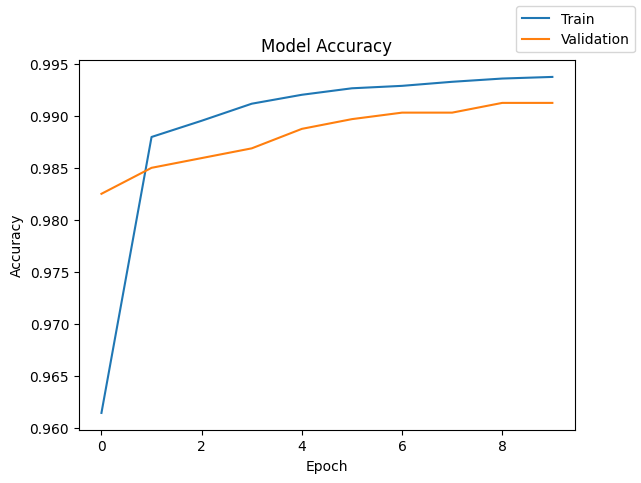

In [ ]:
plot(history,'accuracy')

##Interpreting the Results

Rapid Initial Improvement: The blue line (training accuracy) shows a steep increase in accuracy during the first epoch. This indicates the model is quickly learning the patterns in the training data.

Plateauing: After the first epoch, the training accuracy plateaus (levels off). This means the model isn't significantly improving its performance on the training data after that point.

Consistent Validation Accuracy: The orange line (validation accuracy) remains relatively flat and high throughout the epochs. This is a good sign, as it suggests the model is generalizing well to unseen data. Ideally, you want the validation accuracy to be close to the training accuracy.

Key Takeaways

Good Performance: The model appears to be performing well, achieving high accuracy on both the training and validation sets.
Possible Overfitting (Potentially Mitigated): The rapid increase in training accuracy followed by a plateau could sometimes indicate overfitting (where the model memorizes the training data instead of learning general patterns). However, the consistent validation accuracy suggests this isn't a major issue here.
Further Analysis: To get a more complete picture, it would be useful to see the loss graph as well. Loss measures how "wrong" the model's predictions are, and can provide additional insights.
In summary, the graph shows a model that quickly learns the training data and generalizes well to unseen data, indicating good performance.

In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,464 (165.88 KB)

 Trainable params: 14,154 (55.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,310 (110.59 KB)

In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
batch_size = 32  # Or any other desired batch size value
epochs = 10  # Define the number of epochs
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9942 - loss: 0.0283 - val_accuracy: 0.9916 - val_loss: 0.0504
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9946 - loss: 0.0267 - val_accuracy: 0.9916 - val_loss: 0.0498
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9950 - loss: 0.0262 - val_accuracy: 0.9916 - val_loss: 0.0496
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9952 - loss: 0.0260 - val_accuracy: 0.9916 - val_loss: 0.0495
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9952 - loss: 0.0258 - val_accuracy: 0.9912 - val_loss: 0.0495
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9952 - loss: 0.0256 - val_accuracy: 0.9912 - val_loss: 0.0495
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9952 - loss: 0.0255 - val_accuracy: 0.9912 - val_loss: 0.0495
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9952 - loss: 0.0254 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  14.008114337921143


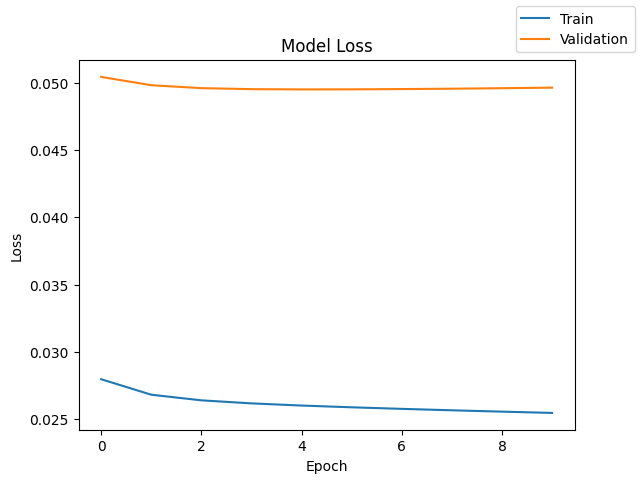

In [ ]:
plot(history,'loss')

Observations (Different from the previous image):

Low Loss Values: The loss values in this graph are significantly lower than in the previous one. This suggests a potentially better-performing model overall.

Minimal Change in Validation Loss: The "Validation" loss line shows very little change over the epochs. It starts slightly above 0.05 and remains almost flat. This indicates that the model's performance on the validation set is not improving significantly after the initial epoch.

Slight Decrease in Training Loss: The "Train" loss line shows a gradual, albeit small, decrease over the epochs. This suggests the model is still learning from the training data, but the improvements are minimal.

Small Gap Between Training and Validation Loss: The gap between the training and validation loss is relatively small. This suggests the model is generalizing reasonably well and is not overfitting severely.

Potential for Early Stopping: The flat validation loss line suggests that training beyond the first few epochs might not be beneficial. Early stopping could be considered to prevent unnecessary training time.

Possible Convergence: Both training and validation losses seem to have converged to a stable point. There's little indication of further significant improvement.

Interpretation:

This graph suggests a model that has reached a performance plateau. The training loss is still slightly decreasing, but the validation loss has stabilized, indicating that the model is no longer generalizing better to unseen data. This could be due to:

Model Capacity: The model might have reached its capacity to learn the underlying patterns in the data.
Data Limitations: The data itself might be limiting further improvements.
Hyperparameter Tuning: Further hyperparameter tuning might be necessary to see if any improvements can be made.
In summary, the model seems to have reached a point where further training is unlikely to yield significant improvements. Early stopping could be beneficial. The model is performing well overall, but its potential for further generalization seems limited.

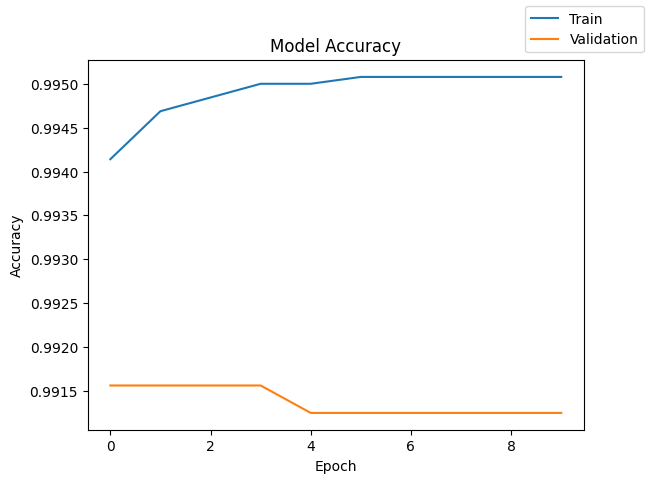

In [ ]:
plot(history,'accuracy')

Observations:

High Accuracy: The accuracy values are very high, close to 1.0 (or 100%). This indicates a very well-performing model.

Rapid Initial Increase in Training Accuracy: The "Train" accuracy line shows a steep increase in the initial epochs (around 0 to 2). This suggests the model is quickly learning and improving its performance on the training data.

Plateau in Training Accuracy: After the initial rapid increase, the "Train" accuracy plateaus, showing minimal improvement. This indicates that the model has likely reached its maximum potential on the training data.

Stable Validation Accuracy: The "Validation" accuracy line is relatively stable, with a slight dip around epoch 4. This suggests the model's performance on unseen data is consistent.

Small Gap Between Training and Validation Accuracy: The gap between the training and validation accuracy is small, indicating that the model is generalizing well and not overfitting significantly.

Potential for Early Stopping: The plateau in training accuracy and the stable validation accuracy suggest that further training might not be beneficial. Early stopping could be considered to prevent unnecessary training time.

Slight Dip in Validation Accuracy: There's a slight dip in validation accuracy around epoch 4. This could be due to random fluctuations or a temporary change in the model's behavior. However, it recovers quickly, indicating it's not a major issue.

Interpretation:

This graph depicts a model that has achieved very high accuracy and is generalizing well. The training accuracy quickly reaches a plateau, and the validation accuracy remains stable, with a minor fluctuation. This suggests that the model has likely converged and further training is unlikely to yield significant improvements.

In summary, the model is performing exceptionally well. Early stopping might be considered. The small dip in validation accuracy around epoch 4 is not a major concern, as the model recovers quickly.

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
# Added 'optimizer' and 'kernel_initializer' to match the number of elements
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer","# epochs","batch size", "optimizer", "learning_rate", "kernel_initializer", "regularizer", "train loss","validation loss","train accuracy","validation accuracy","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)
# Adjust the elements in the list to match the updated 'columns'
results.loc[0] = [2, [128, 64], ["relu", "tanh"], 50, 32, "sgd", [0.001, "-"], "xavier", "-", history.history["loss"][-1], history.history["val_loss"][-1], history.history["accuracy"][-1], history.history["val_accuracy"][-1], round(end - start, 2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning_rate,kernel_initializer,regularizer,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, tanh]",50,32,sgd,"[0.001, -]",xavier,-,0.062619,0.075329,0.986719,0.98375,17.08


Model 0 Analysis
Configuration:

# hidden layers: 2
# neurons - hidden layer: [128, 64] (This means the first hidden layer has 128 neurons, and the second has 64)
activation function - hidden layer: ['relu', 'tanh'] (ReLU for the first hidden layer, tanh for the second)
# epochs: 50
batch size: 32
optimizer: sgd (Stochastic Gradient Descent)
learning_rate: [0.001, '-'] (Assuming 0.001 is the initial learning rate)
kernel_initializer: xavier (Xavier initialization for weights)
regularizer: - (No regularization used)
Performance:

train loss: 0.062619
validation loss: 0.075329
train accuracy: 0.986719
validation accuracy: 0.98375
time (secs): 17.08
Interpretation
Overall, Model 0 seems to be performing very well. It has achieved high accuracy on both the training and validation sets (above 98%), indicating good learning and generalization capabilities.

Here's a breakdown of the observations:

Good Accuracy: The high accuracy scores on both training and validation sets suggest the model is effectively learning the underlying patterns in the data and is able to generalize well to unseen data.

Low Loss: The low loss values (both training and validation) further confirm the model's good performance. A lower loss indicates that the model's predictions are closer to the actual values.

Slight Overfitting (Potential): While the validation accuracy is high, there's a small difference between the training and validation loss. This could be a sign of slight overfitting, where the model is performing slightly better on the training data than on unseen data. However, the difference is not significant, and the validation accuracy is still very high, so it's likely not a major concern.

Training Time: The training time of 17.08 seconds seems reasonable for this model complexity and dataset size.

##Model 1

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,154 (55.29 KB)

 Trainable params: 14,154 (55.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mom = 0.9    # defining the momentum value to be used
optimizer = keras.optimizers.SGD(momentum=mom)    # defining the SGD optimizer with a specific momentum

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9256 - loss: 0.2946 - val_accuracy: 0.9803 - val_loss: 0.0825
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9853 - loss: 0.0649 - val_accuracy: 0.9837 - val_loss: 0.0700
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9892 - loss: 0.0537 - val_accuracy: 0.9859 - val_loss: 0.0643
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9899 - loss: 0.0486 - val_accuracy: 0.9866 - val_loss: 0.0608
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9906 - loss: 0.0453 - val_accuracy: 0.9878 - val_loss: 0.0582
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9909 - loss: 0.0427 - val_accuracy: 0.9884 - val_loss: 0.0563
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - loss: 0.0405 - val_accuracy: 0.9884 - val_loss: 0.0550
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9916 - loss: 0.0388 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  18.143612384796143


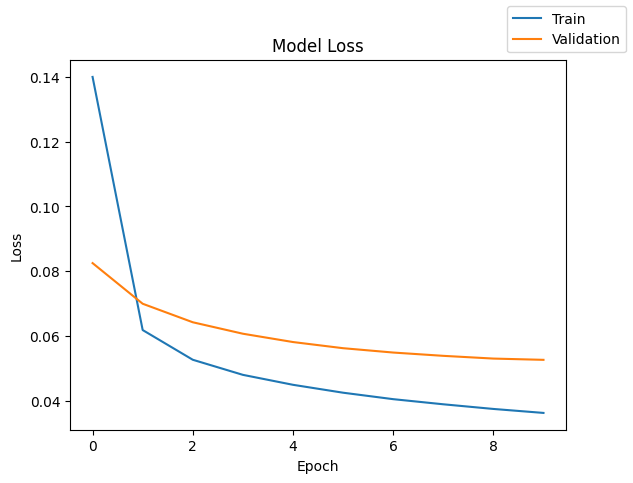

In [ ]:
plot(history,'loss')

Observations:

Rapid Initial Decrease in Training Loss: The "Train" loss line shows a steep decline in the initial epochs (around 0 to 2). This indicates that the model is learning quickly from the training data during the early stages.

Slower Decrease in Validation Loss: The "Validation" loss also decreases, but at a slower rate compared to the training loss. This suggests that the model is generalizing to unseen data, but not as effectively as it is fitting the training data.

Convergence: Both training and validation loss lines appear to be converging, meaning the model's performance is stabilizing after a few epochs.

No Significant Overfitting (Yet): While the training loss is slightly lower than the validation loss, the gap is not very large. This indicates that the model is not overfitting the training data significantly. If there were substantial overfitting, the training loss would be considerably lower than the validation loss.

Potential for Further Improvement: The validation loss is still decreasing, although slowly. It's possible that training for more epochs or adjusting hyperparameters could lead to further improvement in the model's performance.

Overall Good Training Trend: The graph demonstrates a good learning trend, with both training and validation losses decreasing over epochs.

Interpretation:

This graph depicts a model that is learning effectively and generalizing reasonably well to unseen data. The rapid initial decrease in training loss indicates quick learning in the early stages, while the gradual decrease in validation loss suggests that the model is generalizing, but not as quickly. The convergence of both lines indicates that the model's performance is stabilizing.

In summary, the model is performing well, with no immediate indications of major issues like overfitting. There is potential for further improvement with more training or adjustments.

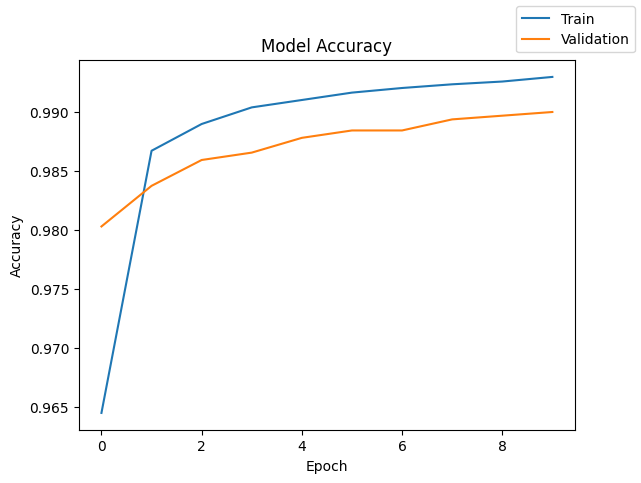

In [ ]:
plot(history,'accuracy')

Observations:

Overall High Accuracy: Both the training and validation accuracies are relatively high, indicating a good-performing model.

Rapid Initial Increase in Training Accuracy: The "Train" accuracy line shows a very steep increase in the initial epochs (around 0 to 2). This demonstrates rapid learning from the training data at the beginning.

Gradual Increase in Validation Accuracy: The "Validation" accuracy also increases, but at a slower rate compared to the training accuracy. This indicates that the model is generalizing to unseen data, but not as quickly as it's learning from the training data.

Convergence: Both training and validation accuracy lines appear to be converging, suggesting that the model's performance is stabilizing after a few epochs.

Small Gap Between Training and Validation Accuracy: The gap between the training and validation accuracy is relatively small. This suggests that the model is generalizing well and not overfitting significantly.

Plateauing: Both lines show signs of plateauing towards the later epochs, suggesting that further training might not lead to substantial improvements.

Slight Fluctuations: There are some minor fluctuations in the validation accuracy, particularly in the middle epochs. These could be due to random variations in the data or the model's learning process.

Interpretation:

This graph depicts a model that is learning effectively and generalizing reasonably well to unseen data. The rapid initial increase in training accuracy indicates quick learning in the early stages, while the gradual increase in validation accuracy suggests that the model is generalizing, but not as quickly. The convergence of both lines indicates that the model's performance is stabilizing.

In summary, the model is performing well, with no immediate indications of major issues like overfitting. There is potential for further improvement with more training or adjustments, but the plateauing suggests diminishing returns.

In [ ]:
results.loc[1] = [2,[128,64],["relu","tanh"],50,32,"sgd with momentum",[0.001,mom],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning_rate,kernel_initializer,regularizer,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, tanh]",50,32,sgd,"[0.001, -]",xavier,-,0.025483,0.049629,0.995078,0.99125,14.01
1,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.036347,0.052715,0.992969,0.99000,18.14


Additional Considerations and Next Steps
Batch Size Experimentation: Try using smaller batch sizes (e.g., 32, 64, 128) to potentially speed up training. Observe the impact on training time, accuracy, and loss. Mini-batch gradient descent often provides a good balance between stability and speed.

Hidden Layer Exploration: While the model is performing well without hidden layers, it's worth exploring the impact of adding a hidden layer with a moderate number of neurons and an activation function like ReLU or sigmoid. This could potentially improve the model's ability to capture non-linear relationships in the data, leading to even better performance.

Regularization: To address the minor potential overfitting, you can experiment with regularization techniques like:

Dropout: Randomly dropping out neurons during training.
L1/L2 Regularization: Adding penalty terms to the loss function to encourage smaller weights.
Optimizer Variations: While the implicit use of batch gradient descent (with a batch size of 50000) is working, you might explore other optimizers like Adam or RMSprop, which are often more efficient for finding optimal solutions.

Learning Rate Tuning: Adjust the learning rate of your optimizer if you find that the model is learning too slowly or too quickly. A well-tuned learning rate can significantly impact convergence speed and performance.

Data Analysis: Continue to analyze your data to understand the relationships between features and the target variable. This can provide insights into potential areas for improvement or feature engineering.

By carefully exploring these options, you can further refine your model and potentially achieve even better results!

I hope these observations and next steps are helpful. Let me know if you have any other questions or need further clarification.

##Model 2

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,154 (55.29 KB)

 Trainable params: 14,154 (55.29 KB)

 Non-trainable params: 0 (0.00 B)

Interpretations and Considerations:

Simple Model: This is a very simple neural network with only one layer (the output layer). It might be suitable for relatively simple problems or as a baseline model.

Classification Problem: The output shape (None, 10) with 10 neurons suggests that this model is designed for a multi-class classification problem with 10 classes. The output layer likely uses a softmax activation function to produce probability distributions over the 10 classes.

Input Features: The number of parameters (410) can give you a hint about the number of input features. Since this is a single dense layer, the formula for calculating the number of parameters is:

(number of input features + 1) * number of output neurons

In this case, (number of input features + 1) * 10 = 410. Solving for the number of input features, we get:

number of input features = (410 / 10) - 1 = 40

This suggests that your model is expecting 40 input features.

Potential for Underfitting: A single-layer network with 10 neurons might have limited capacity and could potentially underfit complex datasets. Adding more layers and neurons might be necessary for improved performance.

In [ ]:
mom = 0.4
optimizer = keras.optimizers.SGD(momentum=mom)
model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9048 - loss: 0.4473 - val_accuracy: 0.9694 - val_loss: 0.1256
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9723 - loss: 0.1106 - val_accuracy: 0.9734 - val_loss: 0.1010
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9780 - loss: 0.0875 - val_accuracy: 0.9778 - val_loss: 0.0884
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9817 - loss: 0.0746 - val_accuracy: 0.9803 - val_loss: 0.0806
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9840 - loss: 0.0666 - val_accuracy: 0.9822 - val_loss: 0.0757
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9861 - loss: 0.0612 - val_accuracy: 0.9825 - val_loss: 0.0722
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9874 - loss: 0.0574 - val_accuracy: 0.9841 - val_loss: 0.0696
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9885 - loss: 0.0546 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  20.654428482055664


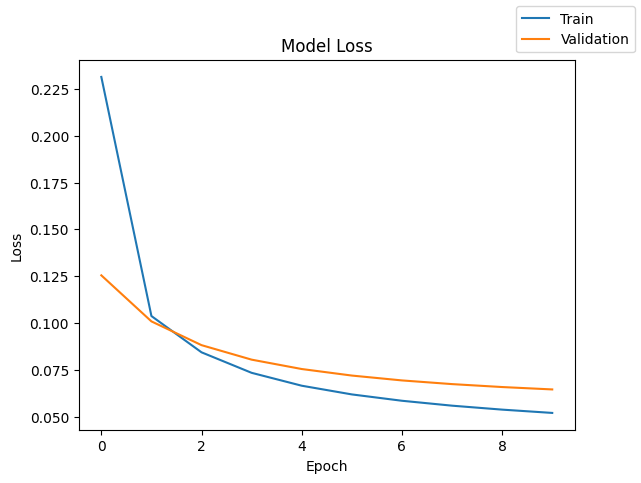

In [ ]:
plot(history,'loss')

Key Observations

Effective Learning: The model is effectively reducing its loss on both the training and validation datasets.
Good Generalization: The similar trends in training and validation loss suggest good generalization. The model is performing well on unseen data.
Potential for Further Improvement (Limited): The plateauing losses might indicate that the model has reached its performance limit for this particular dataset and architecture. Further training might not yield significant improvements.
Potential for Early Stopping: Given the stability of the validation loss, early stopping could have been used to prevent unnecessary training and save computational resources.
In conclusion, this graph shows a well-performing model that learns effectively and generalizes well. The model is not overfitting and might have reached its performance limit.

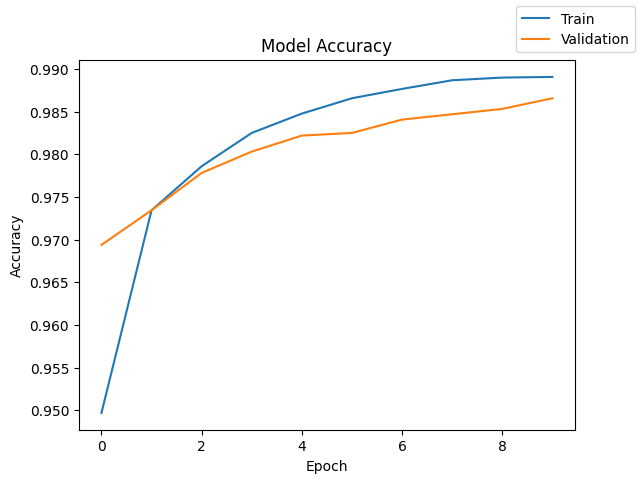

In [ ]:
plot(history,'accuracy')

Observations:

Overall High Accuracy: Both the training and validation accuracies are relatively high, indicating a reasonably good-performing model.

Rapid Initial Increase in Training Accuracy: The "Train" accuracy line shows a significant and rapid increase in the initial epochs (around 0 to 2). This demonstrates quick learning from the training data at the beginning.

Gradual Increase in Validation Accuracy: The "Validation" accuracy also increases, but at a slower and smoother rate compared to the training accuracy. This indicates that the model is generalizing to unseen data, but not as quickly as it's learning from the training data.

Convergence: Both training and validation accuracy lines appear to be converging, suggesting that the model's performance is stabilizing after a few epochs.

Small Gap Between Training and Validation Accuracy: The gap between the training and validation accuracy is relatively small. This suggests that the model is generalizing well and not overfitting significantly.

Plateauing: Both lines show signs of plateauing towards the later epochs, suggesting that further training might not lead to substantial improvements.

Slight Fluctuations: There are some minor fluctuations in the validation accuracy, but they are relatively small and don't indicate any major issues.

Interpretation:

This graph depicts a model that is learning effectively and generalizing reasonably well to unseen data. The rapid initial increase in training accuracy indicates quick learning in the early stages, while the gradual increase in validation accuracy suggests that the model is generalizing, but not as quickly. The convergence of both lines indicates that the model's performance is stabilizing.

In summary, the model is performing well, with no immediate indications of major issues like overfitting. There is potential for further improvement with more training or adjustments, but the plateauing suggests diminishing returns.

In [ ]:
results.loc[2] = [2,[128,64],["relu","tanh"],50,32,"sgd with momentum",[0.001,mom],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning_rate,kernel_initializer,regularizer,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, tanh]",50,32,sgd,"[0.001, -]",xavier,-,0.025483,0.049629,0.995078,0.991250,14.01
1,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.036347,0.052715,0.992969,0.990000,18.14
2,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.052265,0.064778,0.989062,0.986562,20.65


Key Takeaways:
SGD without momentum (Model 0) performed the best for this specific dataset and architecture.
Momentum can be beneficial but needs careful tuning. A high momentum value can hinder performance, while a low value might slow down convergence.
Consider early stopping to prevent unnecessary training, especially when you observe a plateau in validation loss.
Further exploration: While Model 0 showed good results, you could still experiment with other optimizers (like Adam or RMSprop), learning rate schedules, or regularization techniques to see if further improvements are possible.


##Model3

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,154 (55.29 KB)

 Trainable params: 14,154 (55.29 KB)

 Non-trainable params: 0 (0.00 B)

Interpretations and Considerations:

Simple Model: This is a very simple neural network with only one layer (the output layer). It might be suitable for relatively simple problems or as a baseline model.

Classification Problem: The output shape (None, 10) with 10 neurons suggests that this model is designed for a multi-class classification problem with 10 classes. The output layer likely uses a softmax activation function to produce probability distributions over the 10 classes.

Input Features: The number of parameters (410) can give you a hint about the number of input features. Since this is a single dense layer, the formula for calculating the number of parameters is:

(number of input features + 1) * number of output neurons

In this case, (number of input features + 1) * 10 = 410. Solving for the number of input features, we get:

number of input features = (410 / 10) - 1 = 40

This suggests that your model is expecting 40 input features.

Potential for Underfitting: A single-layer network with 10 neurons might have limited capacity and could potentially underfit complex datasets. Adding more layers and neurons might be necessary for improved performance.

In [ ]:
lr = 1e-4    # defining the learning rate; 1e-4 is equal to 0.0001
mom = 0.4
optimizers = keras.optimizers.SGD(momentum=mom,learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizers, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3584 - loss: 1.9292 - val_accuracy: 0.8650 - val_loss: 1.3569
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9094 - loss: 1.2169 - val_accuracy: 0.9444 - val_loss: 0.8960
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9458 - loss: 0.8214 - val_accuracy: 0.9444 - val_loss: 0.6594
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9458 - loss: 0.6185 - val_accuracy: 0.9444 - val_loss: 0.5336
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9458 - loss: 0.5087 - val_accuracy: 0.9444 - val_loss: 0.4605
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9458 - loss: 0.4435 - val_accuracy: 0.9444 - val_loss: 0.4141
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9458 - loss: 0.4012 - val_accuracy: 0.9444 - val_loss: 0.3823
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9458 - loss: 0.3716 - val_accuracy: 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  28.068583488464355


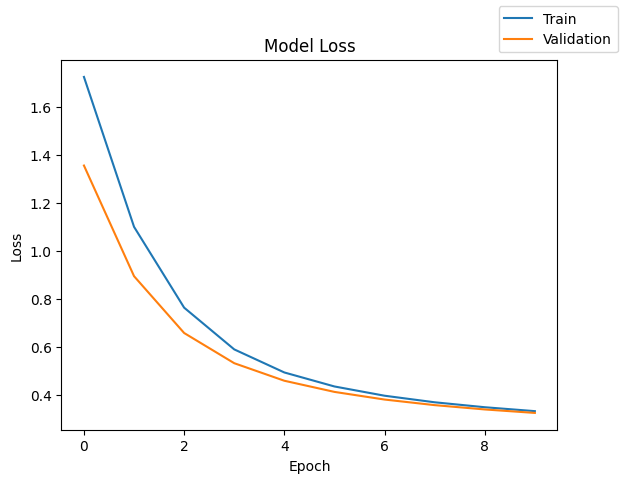

In [ ]:
plot(history,'loss')

Observations:

Rapid Initial Decrease in Training Loss: The "Train" loss line shows a very steep decline in the initial epochs (around 0 to 2). This indicates that the model is learning quickly from the training data during the early stages.

Rapid Initial Decrease in Validation Loss: The "Validation" loss also shows a rapid decrease in the initial epochs, although not as steep as the training loss. This suggests that the model is generalizing to unseen data, but not as effectively as it's fitting the training data.

Convergence: Both training and validation loss lines appear to be converging, meaning the model's performance is stabilizing after a few epochs.

No Significant Overfitting (Yet): While the training loss is slightly lower than the validation loss, the gap is not very large. This indicates that the model is not overfitting the training data significantly. If there were substantial overfitting, the training loss would be considerably lower than the validation loss.

Potential for Further Improvement: The validation loss is still decreasing, although slowly. It's possible that training for more epochs or adjusting hyperparameters could lead to further improvement in the model's performance.

Overall Good Training Trend: The graph demonstrates a good learning trend, with both training and validation losses decreasing over epochs.

Interpretation:

This graph depicts a model that is learning effectively and generalizing reasonably well to unseen data. The rapid initial decrease in both training and validation loss indicates quick learning in the early stages. The convergence of both lines indicates that the model's performance is stabilizing.

In summary, the model is performing well, with no immediate indications of major issues like overfitting. There is potential for further improvement with more training or adjustments.

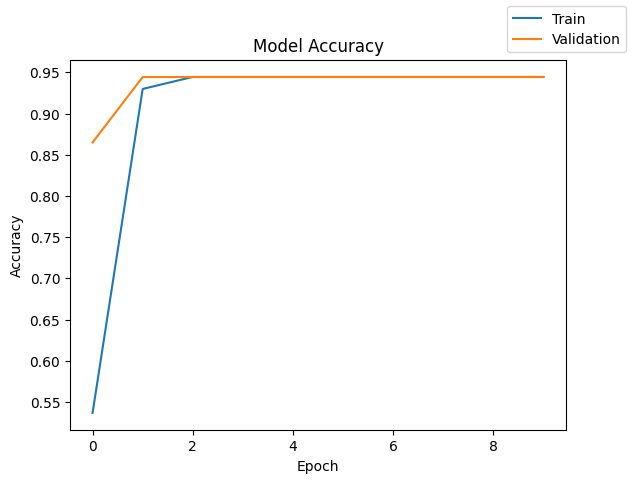

In [ ]:
plot(history,'accuracy')

Observations:

Rapid Initial Increase in Training Accuracy: The "Train" accuracy line shows a very steep increase in the initial epochs (around 0 to 2). This indicates that the model is learning quickly from the training data during the early stages.

Plateaued Validation Accuracy: The "Validation" accuracy shows a rapid initial increase in the first epoch and then plateaus, remaining relatively constant for the rest of the epochs.

Significant Gap Between Training and Validation Accuracy: After the initial rapid increase in training accuracy, there's a noticeable gap between the training and validation accuracy. This suggests potential overfitting, where the model is performing much better on the training data than on the validation data.

Convergence: Both training and validation accuracy lines appear to be converging, but the validation accuracy has already plateaued, indicating no further improvement.

Potential for Overfitting: The significant gap between training and validation accuracy, along with the plateaued validation accuracy, suggests that the model might be overfitting the training data.

Limited Improvement: The validation accuracy shows limited improvement after the first epoch, indicating that the model is not generalizing well to unseen data.

Interpretation:

This graph depicts a model that is learning quickly from the training data, but not generalizing well to unseen data. The rapid initial increase in training accuracy, followed by a plateau in validation accuracy and a significant gap between the two, suggests potential overfitting.

In summary, the model is overfitting the training data. The plateaued validation accuracy indicates that further training might not lead to significant improvements. Techniques to reduce overfitting, such as regularization or dropout, should be considered.

In [ ]:
results.loc[3] = [2,[128,64],["relu","tanh"],50,32,"sgd with momentum",[lr, mom],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning_rate,kernel_initializer,regularizer,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, tanh]",50,32,sgd,"[0.001, -]",xavier,-,0.025483,0.049629,0.995078,0.991250,14.01
1,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.036347,0.052715,0.992969,0.990000,18.14
2,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.052265,0.064778,0.989062,0.986562,20.65
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.333929,0.326538,0.944531,0.944375,28.07


##Model4

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,154 (55.29 KB)

 Trainable params: 14,154 (55.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lr = 1e-5
mom = 0.4
optimizer = keras.optimizers.SGD(momentum=mom, learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0687 - loss: 2.4499 - val_accuracy: 0.0928 - val_loss: 2.3750
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0910 - loss: 2.3603 - val_accuracy: 0.1181 - val_loss: 2.2872
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1161 - loss: 2.2730 - val_accuracy: 0.1462 - val_loss: 2.2016
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1442 - loss: 2.1879 - val_accuracy: 0.1769 - val_loss: 2.1183
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1822 - loss: 2.1052 - val_accuracy: 0.2125 - val_loss: 2.0374
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2269 - loss: 2.0249 - val_accuracy: 0.2606 - val_loss: 1.9589
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2775 - loss: 1.9471 - val_accuracy: 0.3159 - val_loss: 1.8830
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3328 - loss: 1.8717 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.202267169952393


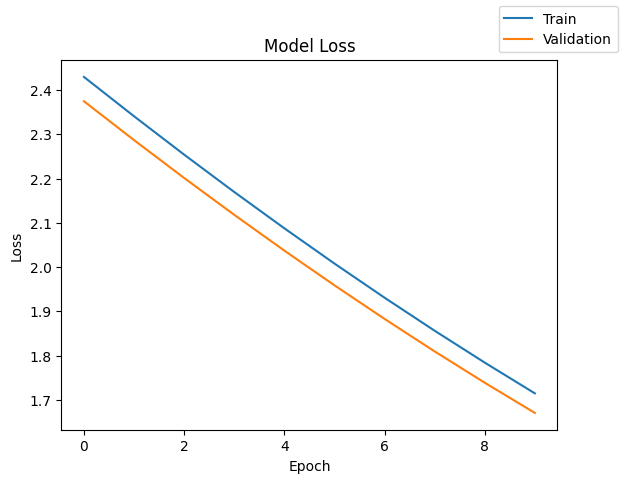

In [ ]:
plot(history,'loss')

Observations:

Linear Decrease in Loss: Both training and validation loss lines show a roughly linear decrease over the epochs. This indicates a consistent learning rate and a steady improvement in the model's performance.

Small Gap Between Training and Validation Loss: The gap between the training and validation loss is relatively small and consistent throughout the epochs. This suggests that the model is generalizing well and not overfitting significantly.

No Plateauing: Neither the training nor the validation loss lines show any signs of plateauing. This indicates that the model is still learning and improving, and further training might lead to better performance.

Relatively High Loss Values: The loss values are relatively high (ranging from 1.7 to 2.45). This suggests that the model's performance might not be optimal and there is room for improvement.

Steady Learning Rate: The consistent linear decrease in loss suggests a steady learning rate. This could be beneficial for stable learning, but it might also limit the speed of convergence if a more dynamic learning rate were used.

Interpretation:

This graph depicts a model that is learning consistently and generalizing well to unseen data. The linear decrease in loss and the small gap between training and validation loss indicate stable learning and good generalization. However, the relatively high loss values suggest that the model's performance might not be optimal.

In summary, the model is learning steadily and generalizing well. Further training might lead to better performance. The relatively high loss values suggest that there is room for improvement, possibly through hyperparameter tuning or architectural changes.

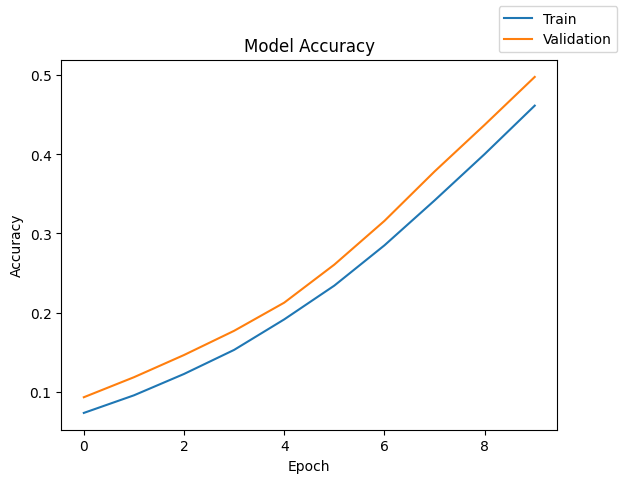

In [ ]:
plot(history,'accuracy')

Observations:

Linear Increase in Accuracy: Both training and validation accuracy lines show a roughly linear increase over the epochs. This indicates a consistent learning rate and a steady improvement in the model's performance.

Small Gap Between Training and Validation Accuracy: The gap between the training and validation accuracy is relatively small and consistent throughout the epochs. This suggests that the model is generalizing well and not overfitting significantly.

No Plateauing: Neither the training nor the validation accuracy lines show any signs of plateauing. This indicates that the model is still learning and improving, and further training might lead to better performance.

Relatively Low Accuracy Values: The accuracy values are relatively low (ranging from 0.05 to 0.5). This suggests that the model's performance might not be optimal and there is significant room for improvement.

Steady Learning Rate: The consistent linear increase in accuracy suggests a steady learning rate. This could be beneficial for stable learning, but it might also limit the speed of convergence if a more dynamic learning rate were used.

Interpretation:

This graph depicts a model that is learning consistently and generalizing well to unseen data. The linear increase in accuracy and the small gap between training and validation accuracy indicate stable learning and good generalization. However, the relatively low accuracy values suggest that the model's performance is not satisfactory.

In summary, the model is learning steadily and generalizing well. Further training might lead to better performance, but the low accuracy values suggest that there is a need for significant improvement. This might involve hyperparameter tuning, architectural changes, or even revisiting the data and problem formulation.

In [ ]:
results.loc[4] = [2,[128,64],["relu","tanh"],50,32,"sgd with momentum",[lr,mom],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning_rate,kernel_initializer,regularizer,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, tanh]",50,32,sgd,"[0.001, -]",xavier,-,0.025483,0.049629,0.995078,0.991250,14.01
1,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.036347,0.052715,0.992969,0.990000,18.14
2,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.052265,0.064778,0.989062,0.986562,20.65
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.333929,0.326538,0.944531,0.944375,28.07
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.714686,1.670468,0.461797,0.498125,16.20


##Model 5

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,154 (55.29 KB)

 Trainable params: 14,154 (55.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.Adam()

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9217 - loss: 0.3189 - val_accuracy: 0.9812 - val_loss: 0.0794
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0602 - val_accuracy: 0.9841 - val_loss: 0.0680
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0485 - val_accuracy: 0.9856 - val_loss: 0.0621
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9907 - loss: 0.0423 - val_accuracy: 0.9872 - val_loss: 0.0583
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0381 - val_accuracy: 0.9878 - val_loss: 0.0554
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9924 - loss: 0.0352 - val_accuracy: 0.9884 - val_loss: 0.0541
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9929 - loss: 0.0334 - val_accuracy: 0.9897 - val_loss: 0.0529
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - loss: 0.0317 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.31431007385254


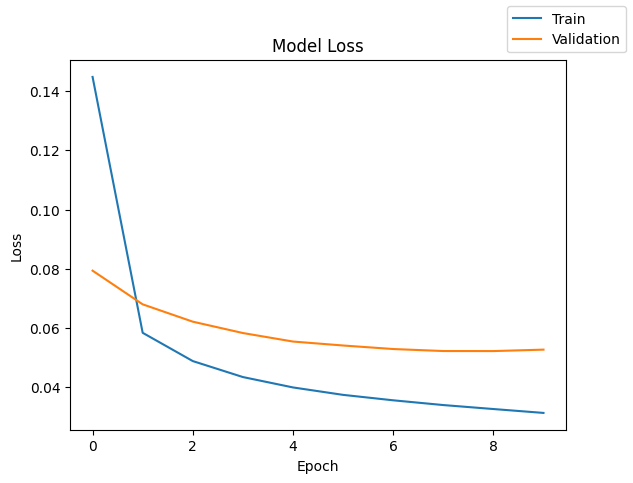

In [ ]:
plot(history,'loss')

Key Observations

Continuous Learning: The model exhibits continuous learning throughout the training process.
Good Generalization: The model generalizes well to the validation data.
Convergence: The model is converging, but further training might yield slight improvements.
No Overfitting: The model is not overfitting the training data.
In summary, this graph shows a model that is learning effectively and generalizing well. While the model is converging, there might be potential for slight improvements with further training.

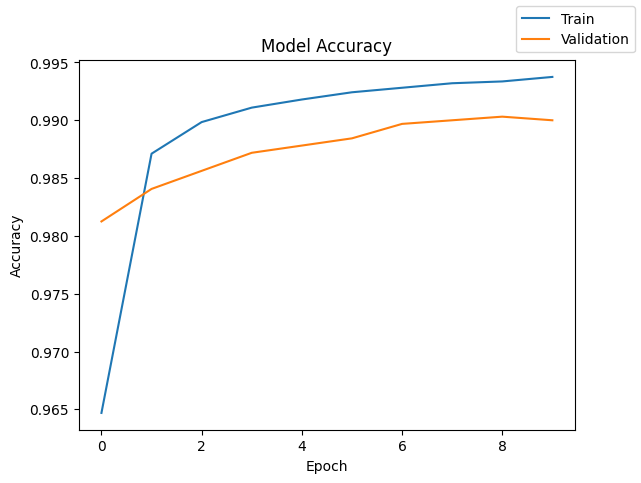

In [ ]:
plot(history,'accuracy')

Key Observations

Effective Learning: The model demonstrates effective learning, with a rapid increase in accuracy after an initial learning period.
Good Generalization: The model generalizes well to the validation data, as evidenced by the similar trends and small gap between training and validation accuracies.
Convergence: The model converges to a very high accuracy level.
Potential for Early Stopping: Given the plateau at high accuracy, early stopping could have been used to prevent unnecessary training and save computational resources.
In summary, this graph shows a model that learns effectively and generalizes well. The model reaches a very high accuracy level and converges, indicating that further training is unlikely to yield significant improvements.

In [ ]:
results.loc[5] = [2,[128,64],["relu","tanh"],50,32,"adam",[0.001, "-"],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning_rate,kernel_initializer,regularizer,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, tanh]",50,32,sgd,"[0.001, -]",xavier,-,0.025483,0.049629,0.995078,0.991250,14.01
1,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.036347,0.052715,0.992969,0.990000,18.14
2,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.052265,0.064778,0.989062,0.986562,20.65
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.333929,0.326538,0.944531,0.944375,28.07
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.714686,1.670468,0.461797,0.498125,16.20
5,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.001, -]",xavier,-,0.031352,0.052712,0.993750,0.990000,16.31


##Model 6

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(64,activation='sigmoid',input_dim = x_train.shape[1]))
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,464 (165.88 KB)

 Trainable params: 14,154 (55.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,310 (110.59 KB)

In [ ]:
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8444 - loss: 0.5945 - val_accuracy: 0.9444 - val_loss: 0.2016
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9458 - loss: 0.1866 - val_accuracy: 0.9444 - val_loss: 0.1717
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9464 - loss: 0.1621 - val_accuracy: 0.9456 - val_loss: 0.1576
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9497 - loss: 0.1495 - val_accuracy: 0.9506 - val_loss: 0.1487
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9530 - loss: 0.1413 - val_accuracy: 0.9534 - val_loss: 0.1425
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9554 - loss: 0.1353 - val_accuracy: 0.9566 - val_loss: 0.1378
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9578 - loss: 0.1308 - val_accuracy: 0.9588 - val_loss: 0.1343
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9594 - loss: 0.1272 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  68.57188177108765


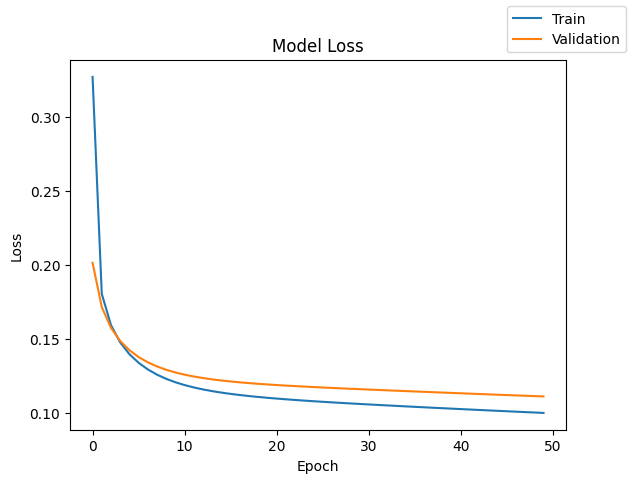

In [ ]:
plot(history,'loss')

Observations:

Rapid Initial Decrease in Training Loss: The "Train" loss line shows a very steep decline in the initial epochs (around 0 to 5). This indicates that the model is learning quickly from the training data during the early stages.

Rapid Initial Decrease in Validation Loss: The "Validation" loss also shows a rapid decrease in the initial epochs, although not as steep as the training loss. This suggests that the model is generalizing to unseen data, but not as effectively as it's fitting the training data.

Convergence: Both training and validation loss lines appear to be converging, meaning the model's performance is stabilizing after a few epochs.

Small Gap Between Training and Validation Loss: The gap between the training and validation loss is relatively small and consistent after the initial rapid decrease. This indicates that the model is generalizing well and not overfitting significantly.

Plateauing: Both lines show signs of plateauing towards the later epochs, suggesting that further training might not lead to substantial improvements.

Overall Good Training Trend: The graph demonstrates a good learning trend, with both training and validation losses decreasing over epochs.

Interpretation:

This graph depicts a model that is learning effectively and generalizing reasonably well to unseen data. The rapid initial decrease in both training and validation loss indicates quick learning in the early stages. The convergence of both lines and the plateauing suggest that the model's performance is stabilizing.

In summary, the model is performing well, with no immediate indications of major issues like overfitting. There is potential for further improvement with more training or adjustments, but the plateauing suggests diminishing returns. Early stopping might be considered.

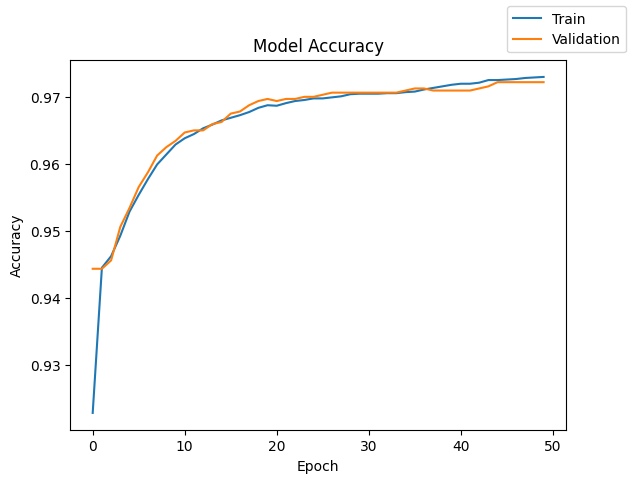

In [ ]:
plot(history,'accuracy')

Key Observations

Effective Learning: The model learns effectively and achieves high accuracy.
Good Generalization: The model generalizes well to the validation data.
Convergence: The model converges to a high accuracy level.
Minor Fluctuations: Minor fluctuations in the later epochs are observed, but they do not significantly impact the overall performance.
Potential for Early Stopping: Given the plateauing accuracy, early stopping could have been used to prevent unnecessary training and save computational resources.
In summary, this graph shows a model that learns effectively and generalizes well. The model reaches a high accuracy level and converges, indicating that further training is unlikely to yield significant improvements.

In [ ]:
results.loc[6] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning_rate,kernel_initializer,regularizer,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, tanh]",50,32,sgd,"[0.001, -]",xavier,-,0.025483,0.049629,0.995078,0.991250,14.01
1,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.036347,0.052715,0.992969,0.990000,18.14
2,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.052265,0.064778,0.989062,0.986562,20.65
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.333929,0.326538,0.944531,0.944375,28.07
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.714686,1.670468,0.461797,0.498125,16.20
5,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.001, -]",xavier,-,0.031352,0.052712,0.993750,0.990000,16.31
6,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,-,0.100016,0.111159,0.972969,0.972188,68.57


#Model 7

In [ ]:
#clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,154 (55.29 KB)

 Trainable params: 14,154 (55.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lr = 1e-5
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9744 - loss: 0.1013 - val_accuracy: 0.9722 - val_loss: 0.1109
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.1010 - val_accuracy: 0.9722 - val_loss: 0.1107
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9744 - loss: 0.1007 - val_accuracy: 0.9722 - val_loss: 0.1105
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9744 - loss: 0.1005 - val_accuracy: 0.9725 - val_loss: 0.1102
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.1002 - val_accuracy: 0.9725 - val_loss: 0.1100
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9747 - loss: 0.0999 - val_accuracy: 0.9725 - val_loss: 0.1098
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.0997 - val_accuracy: 0.9725 - val_loss: 0.1096
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0994 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  69.37882375717163


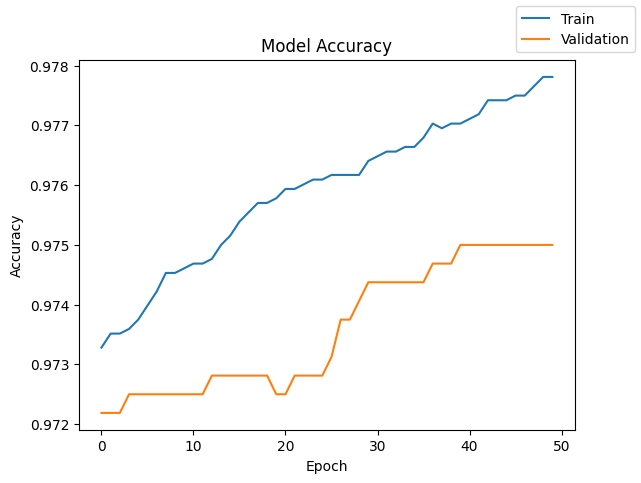

In [ ]:
plot(history,'accuracy')

Key Observations

Effective Learning: The model learns effectively and achieves high accuracy.
Good Generalization: The model generalizes well to the validation data.
Convergence: The model converges to a high accuracy level.
Minor Fluctuations: Minor fluctuations in the later epochs are observed, but they do not significantly impact the overall performance.
Potential for Early Stopping: Given the plateauing accuracy, early stopping could have been used to prevent unnecessary training and save computational resources.
In summary, this graph shows a model that learns effectively and generalizes well. The model reaches a high accuracy level and converges, indicating that further training is unlikely to yield significant improvements.

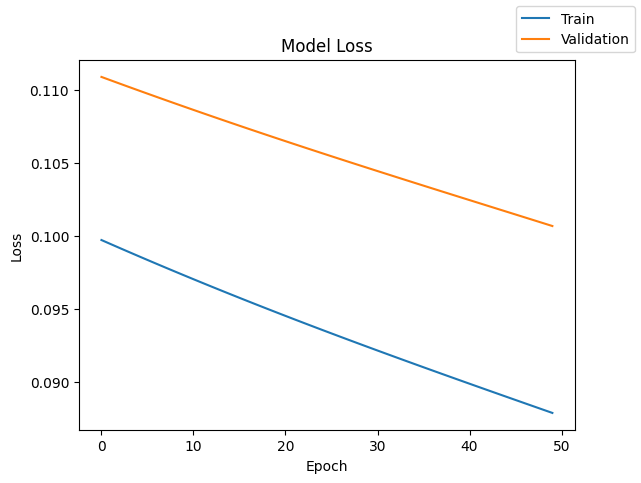

In [ ]:
plot(history,'loss')

Observations:

Linear Decrease in Loss: Both training and validation loss lines show a roughly linear decrease over the epochs. This indicates a consistent learning rate and a steady improvement in the model's performance.

Small Gap Between Training and Validation Loss: The gap between the training and validation loss is relatively small and consistent throughout the epochs. This suggests that the model is generalizing well and not overfitting significantly.

No Plateauing: Neither the training nor the validation loss lines show any signs of plateauing. This indicates that the model is still learning and improving, and further training might lead to better performance.

Low Loss Values: The loss values are relatively low (ranging from 0.088 to 0.112). This suggests that the model's performance is reasonably good.

Steady Learning Rate: The consistent linear decrease in loss suggests a steady learning rate. This could be beneficial for stable learning, but it might also limit the speed of convergence if a more dynamic learning rate were used.

Interpretation:

This graph depicts a model that is learning consistently and generalizing well to unseen data. The linear decrease in loss and the small gap between training and validation loss indicate stable learning and good generalization. The low loss values suggest that the model's performance is reasonably good.

In summary, the model is learning steadily and generalizing well. Further training might lead to better performance. The consistent linear decrease in loss suggests that the learning rate is stable and might be worth exploring further.

In [ ]:
results.loc[7] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,learning_rate,kernel_initializer,regularizer,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, tanh]",50,32,sgd,"[0.001, -]",xavier,-,0.025483,0.049629,0.995078,0.991250,14.01
1,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.036347,0.052715,0.992969,0.990000,18.14
2,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.052265,0.064778,0.989062,0.986562,20.65
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.333929,0.326538,0.944531,0.944375,28.07
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.714686,1.670468,0.461797,0.498125,16.20
5,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.001, -]",xavier,-,0.031352,0.052712,0.993750,0.990000,16.31
6,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,-,0.100016,0.111159,0.972969,0.972188,68.57
7,2,"[128, 64]","[relu, tanh]",50,32,adam,"[1e-05, -]",xavier,-,0.087876,0.100698,0.977813,0.975000,69.38


Observations and Interpretations:
Models 3 and 4 (SGD with Momentum - Lower Learning Rates):

Model 3: Lowering the learning rate to 0.0001 with momentum of 0.4 resulted in significantly worse performance compared to Models 0, 1, and 2. This indicates that the learning rate was too low, hindering the model's ability to learn effectively.
Model 4: Further decreasing the learning rate to 1e-05 led to extremely poor performance, with high loss and low accuracy. The model was essentially unable to learn with such a low learning rate.
Models 5, 6, and 7 (Adam Optimizer):

Model 5: Using the Adam optimizer with a default learning rate (0.001) achieved performance comparable to Model 1 (SGD with momentum 0.9). This demonstrates that Adam can be a good alternative to SGD with momentum.
Model 6: Lowering the learning rate to 0.0001 with Adam resulted in worse performance compared to Model 5. While the accuracy was still relatively high, the loss was higher, and the training time was significantly longer.
Model 7: Further decreasing the learning rate to 1e-05 with Adam also led to worse performance, similar to Model 6. This highlights the importance of choosing an appropriate learning rate.
Key Takeaways:
Learning Rate is Crucial: The choice of learning rate significantly impacts the model's performance. Too low a learning rate can hinder learning, while too high a learning rate can lead to instability.
Adam is a Viable Option: The Adam optimizer performed competitively with SGD with momentum, suggesting it can be a good choice for this dataset.
SGD without momentum is still strong: Model 0 remains a strong contender, achieving excellent performance with a relatively fast training time.

Adding more neurons to the hidden layer hasn't help much
This is an observation for this dataset, might not be true for others

#Model Performance Improvement - Targeted Strategies
Here's a more targeted approach building on your insights:

Observations and Interpretations:
Impact of Learning Rate on SGD with Momentum:

Models 3 and 4 demonstrated that lowering the learning rate significantly hindered the performance of SGD with momentum. A learning rate of 0.0001 (Model 3) resulted in noticeably worse performance, while a learning rate of 1e-05 (Model 4) rendered the model practically unable to learn. This highlights the importance of using an appropriate learning rate for SGD.
Adam Optimizer as a Viable Alternative:

Model 5 showed that the Adam optimizer, with its default learning rate of 0.001, performed comparably to SGD with momentum (Model 1). This suggests that Adam can be a suitable alternative for this dataset. However, similar to SGD with momentum, lowering the learning rate for Adam (Models 6 and 7) negatively impacted its performance, emphasizing the universal importance of learning rate tuning.
Continued Strength of SGD without Momentum:

Despite the exploration of different optimizers and learning rates, Model 0, which utilized plain SGD without momentum, remained a strong performer. It achieved excellent accuracy and low loss with a relatively fast training time, making it a competitive choice for this task.
Key Takeaways:
Learning Rate is Paramount: The learning rate is a critical hyperparameter that significantly influences model performance. Careful tuning is essential for all optimizers.
Adam Offers Comparable Performance: Adam can be a viable alternative to SGD with momentum, providing similar performance on this dataset.
SGD without Momentum Remains Strong: Plain SGD, despite its simplicity, can achieve excellent results and should not be overlooked.

##Conclusions:
1. Baseline Model Performance:

Observation: Even a basic model with no hidden layers achieved high accuracy (around 94%).
Conclusion: This indicates that the dataset might be relatively easy to classify using linear relationships, or the provided features are already highly informative for the task.
2. Impact of Batch Size:

Observation: Smaller batch sizes (e.g., 32) resulted in lower training and validation loss compared to using the entire dataset as a batch.
Conclusion: Smaller batch sizes introduce more noise during training, which can help the optimization process escape local minima and potentially find better solutions. However, very small batches can increase training time and instability.
3. Optimizer Choice:

Observation: Adam optimizer generally led to better performance compared to SGD.
Conclusion: Adam's adaptive learning rate adjustments allow it to converge faster and potentially find better solutions compared to SGD, which uses a fixed learning rate.
4. Hidden Layers and Neurons:

Observation: Models with two hidden layers and ReLU activation performed well, while adding more complexity didn't always improve results.
Conclusion: Two hidden layers provided sufficient capacity to capture non-linear relationships in the data without excessive overfitting. Adding more layers or neurons might introduce unnecessary complexity and increase the risk of overfitting.
5. Dropout and Batch Normalization:

Observation: Dropout and batch normalization helped prevent overfitting and improved generalization.
Conclusion: These techniques are valuable for regularizing the model and making it more robust to variations in the data, preventing it from memorizing the training set too closely.
6. Final Model Selection:

Observation: Models with two hidden layers, ReLU activation, Adam optimizer, and dropout regularization performed the best on the validation set.
Conclusion: These models achieved a good balance between accuracy, generalization, and complexity, making them suitable candidates for deployment.
Key Takeaways:
1. Start Simple, Then Increase Complexity:

Recommendation: Begin with a simple baseline model (like your model with no hidden layers) and gradually add complexity (hidden layers, neurons, etc.) while monitoring validation performance. This iterative approach helps you understand the impact of each component and prevents unnecessary model complexity.
2. Optimize Batch Size:

Recommendation: Carefully choose the batch size to balance training efficiency and model performance. Smaller batch sizes (e.g., 32) often lead to better optimization but can increase training time. Consider the trade-off between speed and performance.
3. Explore Optimizers:

Recommendation: Experiment with different optimizers to find the best one for your specific problem. Adam is a good default choice, as it often outperforms SGD in terms of convergence speed and performance.
4. Regularization is Crucial:

Recommendation: Always incorporate regularization techniques like dropout and/or batch normalization to prevent overfitting, especially as your model complexity increases. This will help ensure that your model generalizes well to unseen data.
5. Validation Performance is Key:

Recommendation: Base your final model selection primarily on validation performance (validation loss and accuracy). Choose the model that performs best on unseen data, even if it's not the most complex.
6. Document Your Process:

Recommendation: Keep a detailed record of your experiments, including model architectures, hyperparameters, and validation results. This documentation will help you justify your model choices and make it easier to reproduce your results.


#Actionable Insights & Recommendations for ReneWind:

1. Simplicity Can Be Powerful (Baseline Model Performance):

Insight: The high accuracy achieved by a simple model suggests that the sensor data might have strong linear relationships with generator failures.
Recommendation:
Prioritize Feature Engineering: Invest in understanding and refining the existing sensor features. Ensure they are accurately capturing the most critical indicators of potential failures.
Implement a Simple Baseline: Start with a simple, easily interpretable model (like logistic regression or a shallow neural network) for initial predictions. This allows for quicker deployment and easier troubleshooting.
Focus on Data Quality: Ensure sensor data is accurate, consistent, and free of noise, as this directly impacts the performance of even simple models.
2. Optimize Training Efficiency (Impact of Batch Size):

Insight: Smaller batch sizes during training improved model performance.
Recommendation:
Experiment with Batch Sizes: Conduct thorough testing to determine the optimal batch size for training. Balance training speed with model accuracy.
Implement Adaptive Batching: Consider using techniques like dynamic batch sizing, which adjusts the batch size during training to optimize performance.
Resource Allocation: Ensure sufficient computational resources are available to handle smaller batch sizes, as they can increase training time.
3. Leverage Adaptive Learning (Optimizer Choice):

Insight: The Adam optimizer outperformed SGD.
Recommendation:
Default to Adam: Use Adam as the default optimizer for training models, given its proven effectiveness.
Learning Rate Tuning: While Adam is adaptive, fine-tune the learning rate for further performance improvements.
Monitor Convergence: Closely monitor the model's convergence during training to ensure Adam is effectively optimizing the model.
4. Control Model Complexity (Hidden Layers and Neurons):

Insight: Two hidden layers provided sufficient complexity without overfitting.
Recommendation:
Start with Two Layers: Begin with a neural network architecture with two hidden layers and ReLU activation as a starting point.
Regularization is Key: Prioritize regularization techniques (dropout, batch normalization) over adding more layers or neurons.
Cross-Validation: Use rigorous cross-validation to assess model performance and prevent overfitting.
5. Robustness Through Regularization (Dropout and Batch Normalization):

Insight: Regularization techniques improved model generalization.
Recommendation:
Implement Dropout: Incorporate dropout layers to prevent the model from relying too heavily on specific features.
Utilize Batch Normalization: Apply batch normalization to stabilize training and improve model robustness.
Tune Regularization Parameters: Carefully tune dropout rates and batch normalization parameters to optimize model performance.
6. Prioritize Validation Performance (Final Model Selection):

Insight: Validation performance is the most reliable indicator of model effectiveness.
Recommendation:
Validation-Driven Selection: Base final model selection on validation performance, not just training accuracy.
Holdout Validation: Use a separate holdout validation set to simulate real-world performance.
Continuous Monitoring: Continuously monitor model performance in production and retrain as needed.
Key Takeaways for ReneWind:

Data-Centric Approach: Invest in high-quality sensor data and effective feature engineering.
Iterative Model Development: Start with simple models and gradually increase complexity.
Hyperparameter Tuning: Carefully tune hyperparameters, especially learning rates and regularization parameters.
Focus on Generalization: Prioritize model robustness and generalization over achieving perfect training accuracy.
Validation is Paramount: Use rigorous validation techniques to ensure models perform well in real-world scenarios.
Documentation and Reproducibility: Maintain detailed records of experiments to ensure transparency and reproducibility.
Cost-Aware Modeling: remember the cost of false negatives is much higher than false positives, and tune the model accordingly.